In [2]:
## Clustering using K-means method

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords

import glob
import re
import spacy

In [3]:
# Read the CSV.file
df=pd.read_csv('preprocess1.csv')
#df.head()

In [4]:
# Round1: Remove the emoji
df['Round1']=df['Translated'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

/var/folders/lv/fc005q_d2fx0299s750b5vw00000gn/T/ipykernel_7969/1366370625.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Round1']=df['Translated'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)


In [5]:
# Round2: Remove punctuation: "," , "'", "..."
df['Round2']=df['Round1'].str.replace('[^\w\s]','')
#print(df['Round2'])

/var/folders/lv/fc005q_d2fx0299s750b5vw00000gn/T/ipykernel_7969/588299801.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Round2']=df['Round1'].str.replace('[^\w\s]','')


In [6]:
# Round3: We lowercase the capitalized words
df ['Round3']= df['Round2'].str.lower()
#print (df['Round3'])

In [7]:
stop_words = stopwords.words('english')
allow_postags = set(['NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'])
nlp = spacy.load('en_core_web_sm')

In [8]:
# Round4: Remove stopwords and lemmatization 
txt2=list(df['Round3'])
join_words_list=[]
for element in txt2:
    words=nlp(element)
    words_list=[]
    for token in words:
        if token.text not in stop_words and token.pos_ in allow_postags:
            words_list.append(token.lemma_)
    for word in words_list:
        join_words =' '.join(words_list)
    join_words_list.append(join_words)

df['Round4']=join_words_list

In [9]:
# Select Date, User, Round4 to make a new dataframe
df_clean = df[['Date','User','Round4']]
descriptions = df_clean['Round4']

In [10]:
# Vectorization using tf-idf
# Term frequency–inverse document frequency, 
# is a numerical statistic that is intended to reflect 
# how important a word is to a document in a collection or corpus.
# how to calculate?
# the frequency of one word appears in one document multiplies LOG(the frequency of the document that contains that word appears in all of the documents)

vectorizer = TfidfVectorizer(
                            
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                    

                            )

In [11]:
tfidf = vectorizer.fit_transform(df['Round4'])

In [12]:
words_df = pd.DataFrame(tfidf.toarray(),
                        columns=vectorizer.get_feature_names_out())
words_df

,able,afraid,also,anonymous,anonymous question,back,bad,child,come,contact,...,try,want,want go,watch,way,week,well,wonder,work,year
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.216120
1,0.257900,0.000000,0.290253,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.0,0.281918,0.0,0.0,0.481201,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.181120,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.331917,...,0.0,0.453778,0.323400,0.0,0.00000,0.267369,0.0,0.0,0.198302,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.123533,0.155652,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.092994,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000
196,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.470114,...,0.0,0.000000,0.000000,0.0,0.40424,0.000000,0.0,0.0,0.000000,0.000000
197,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.554035
198,0.259622,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.419992,0.299322,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000


In [13]:
feature_names = vectorizer.get_feature_names()

dense = tfidf.todense()
denselist = dense.tolist()


/Users/danmengcai/opt/anaconda3/envs/newPy/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
all_keywords = []
for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (descriptions[0])
print (all_keywords[0])


good night let leave nagi go sleep draw almost year start draw nagi first time long time often draw middle night write lot go bed moment remember nagi maybe difficult situation synchronize
['first', 'first time', 'go', 'good', 'leave', 'let', 'long', 'lot', 'maybe', 'night', 'sleep', 'start', 'time', 'year']


In [15]:
# The K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, 
# and then performs iterative (repetitive) calculations to optimize the positions of the centroids
# It halts creating and optimizing clusters when either:
# The centroids have stabilized — there is no change in their values because the clustering has been successful.
# The defined number of iterations has been achieved.

true_k = 5
model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)
model.fit(tfidf)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [16]:
# Write the result in a txt.file  

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

with open ("/Users/danmengcai/Desktop/Folders/PyPractice/japanese_tweets_analysis/results.txt", "w", encoding="utf-8") as f:
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
kmean_indices=model.fit_predict(tfidf)

In [19]:
pca=PCA(n_components=2)
scatter_plot_points=pca.fit_transform(tfidf.toarray())




In [20]:
colors = ["r","b","c","y","m"]

In [21]:
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]


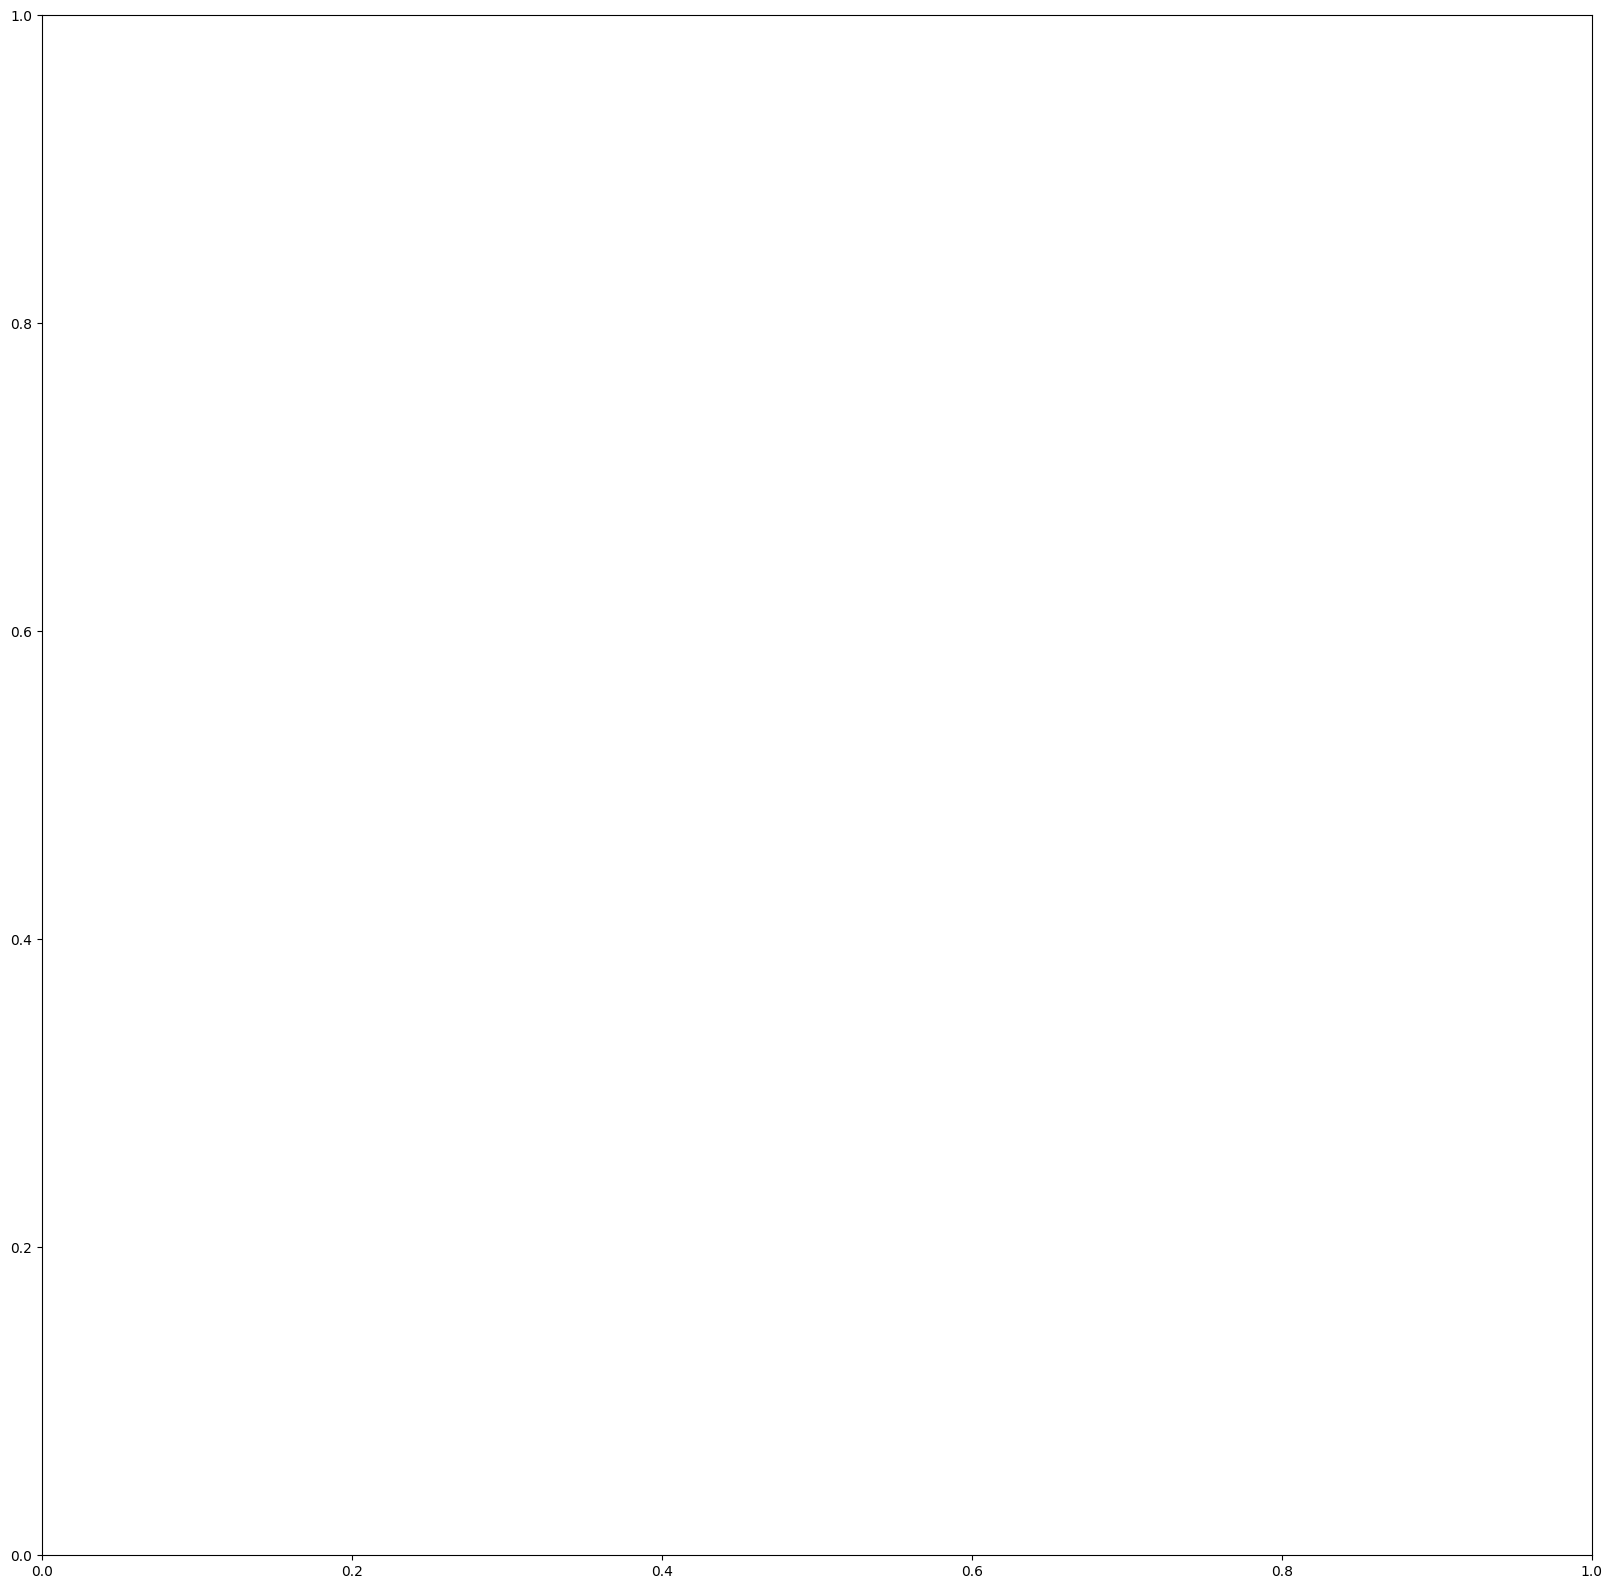

In [22]:
fig, ax=plt.subplots(figsize=(20,20))

In [23]:
ax.scatter(x_axis,y_axis,c=[colors[d] for d in kmean_indices])

In [24]:
names = df_clean['User']

In [25]:
for i, txt in enumerate(names):
    ax.annotate(txt[0:5],(x_axis[i], y_axis[i]))

In [26]:
plt.savefig("pic.png")

<Figure size 640x480 with 0 Axes>